In [2]:
7//7

1

22.0
[1, 2, 7, 8, 13, 15, 19]


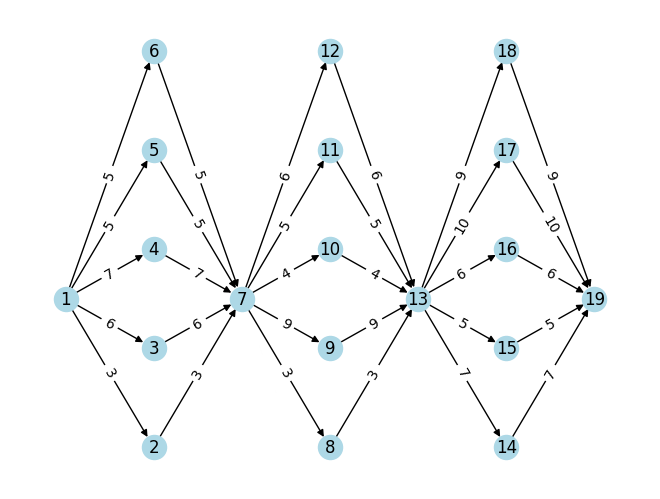

In [1]:
from classes import *
import matplotlib.pyplot as plt
import networkx as nx
import random
import utils as u

#seed = 196796533
#random.seed(seed)

nnodes = 7
layers = 3

N,end_node = u.generate_random_graph2(nnodes,layers)

N.show2()
path, evader_cost = N.calculate_evader_cost(1,end_node)
print(evader_cost)
print(path)


18.0
[1, 2, 3, 7]


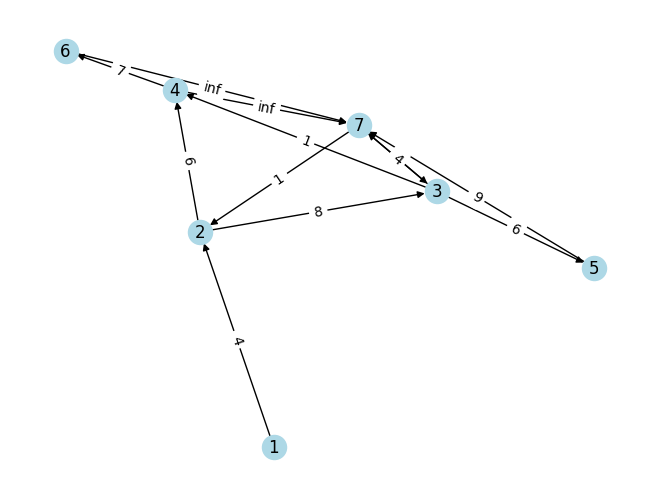

In [ ]:
N.interdict()
N.show()
path, evader_cost = N.calculate_evader_cost(1,nnodes)
print(evader_cost)
print(path)
